# Titanic - RandomForest e Features Engineering
Este notebook cria um modelo baseado no dataset do Titanic e usando RandomForests. Esse notebook trata de dados faltantes, features categóricas e um pouco de feature engineering.

Vamos começar importando as bibliotecas básicas que vamos usar.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Próximo passo: carregando os dados a partir dos CSVs disponibilizados no Kaggle. Estamos usando a biblioteca pandas para esse propósito.

In [2]:
# Vamos iniciar o notebook importanto o Dataset
titanic_df = pd.read_csv("../input/train.csv")
test_df    = pd.read_csv("../input/test.csv")

# Podemos observar as primeiras linhas dele.
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Vamos começar com o básico de tratamento desse dataset. Importante: tudo que fizermos vamos fazer no dataset de treinamento e também de teste.

## Tratando a Idade - Imputation

Nos casos anteriores, avisamos que idade tinha campos vazios.

In [6]:
titanic_df[pd.isnull(titanic_df['Age'])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


Teremos que preencher isso de algum jeito. Uma abordagem comum nesses casos é usar uma média ou mediana. Vamos usar aqui a mediana do dataset - mas poderíamos agrupar por sexo, por exemplo. Fica a seu critério fazer isso de forma mais fancy. ;)

In [4]:
age_median = titanic_df['Age'].median()
print(age_median)

28.0


In [5]:
titanic_df['Age'] = titanic_df['Age'].fillna(age_median)
test_df['Age'] = test_df['Age'].fillna(age_median)

Ótimo! Um problema a menos. Essa técnica que usamos é chamada de "imputation".

## Tratando Gênero - LabelEncoding

Próximo passo: vamos tratar das features categóricas. Queremos transformar features que são de múltiplas categorias em dados numéricos que podemos trabalhar. O caso mais óbivo é sexo.

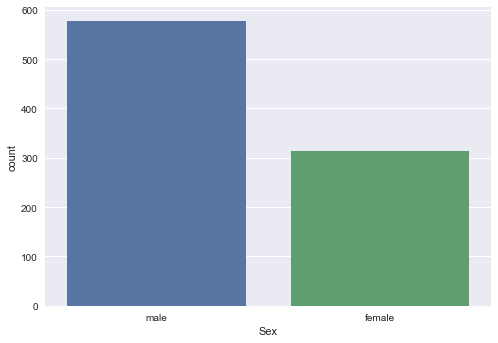

In [7]:
import seaborn as sns
sns.countplot(titanic_df['Sex']);

Vamos usar aqui um transformer do sklearn chamado LabelEncoder. Ele transforma a primeira categoria no número 0, a segunda no número 1 e assim por diante.

In [8]:
from sklearn.preprocessing import LabelEncoder
sex_encoder = LabelEncoder()

sex_encoder.fit(list(titanic_df['Sex'].values) + list(test_df['Sex'].values))

LabelEncoder()

In [9]:
sex_encoder.classes_

array(['female', 'male'], 
      dtype='<U6')

In [10]:
titanic_df['Sex'] = sex_encoder.transform(titanic_df['Sex'].values)
test_df['Sex'] = sex_encoder.transform(test_df['Sex'].values)

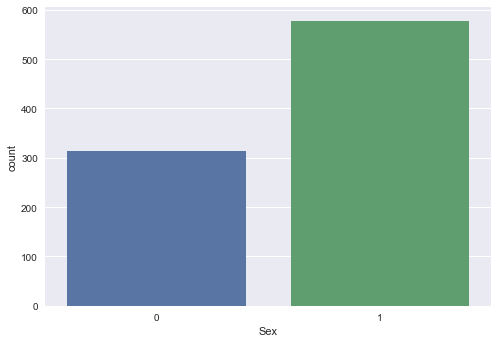

In [11]:
sns.countplot(titanic_df['Sex']);

Ok, a feature Sex já está devidamente encodada. Vamos dar mais uma espiada nos dados?

In [12]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


Já temos mais colunas numéricas. Vamos estudar o impacto de adicionar essas colunas no nosso modelo. Vamos usar o nosso modelo anterior.

In [13]:
feature_names = ['Pclass', 'SibSp', 'Parch', 'Fare']

In [14]:
from sklearn.model_selection import train_test_split
train_X, valid_X, train_y, valid_y = train_test_split(titanic_df[feature_names].as_matrix(), 
                                                      titanic_df['Survived'].as_matrix(),
                                                      test_size=0.2,
                                                      random_state=42)
                                                      
                                                      
print(train_X.shape)
print(valid_X.shape)                                           
print(train_y.shape)
print(valid_y.shape)

(712, 4)
(179, 4)
(712,)
(179,)


In [15]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=42, n_estimators=200, max_depth=7)
rf_clf.fit(train_X, train_y)
print(rf_clf.score(train_X, train_y))
print(rf_clf.score(valid_X, valid_y))

0.783707865169
0.737430167598


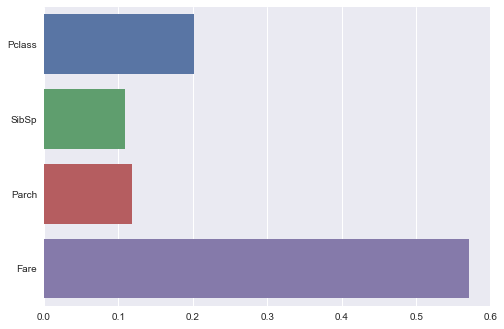

In [16]:
import seaborn as sns
sns.barplot(rf_clf.feature_importances_, feature_names);

Vamos incluir algumas features adicionais

(712, 6)
(179, 6)
(712,)
(179,)
0.933988764045
0.815642458101


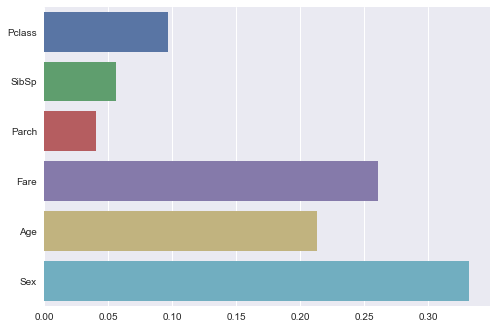

In [17]:
feature_names = ['Pclass', 'SibSp', 'Parch', 'Fare', 'Age', 'Sex']

from sklearn.model_selection import train_test_split
train_X, valid_X, train_y, valid_y = train_test_split(titanic_df[feature_names].as_matrix(), 
                                                      titanic_df['Survived'].as_matrix(),
                                                      test_size=0.2,
                                                      random_state=42)
                                                      
                                                      
print(train_X.shape)
print(valid_X.shape)                                           
print(train_y.shape)
print(valid_y.shape)

rf_clf = RandomForestClassifier(random_state=42, n_estimators=200, max_depth=10)
rf_clf.fit(train_X, train_y)
print(rf_clf.score(train_X, train_y))
print(rf_clf.score(valid_X, valid_y))

sns.barplot(rf_clf.feature_importances_, feature_names);

Melhoramos um pouco o nosso score de validação. Depois de incluir as novas features no modelo, agora Sexo passa a ser a feature mais importante.

## Feature Engineering - Título

Feature Engineering é uma técnica que envolve criar novas features - em geral a partir de outras. Vamos usar essa técnica para extrair o título a partir do nome.

In [18]:
titanic_df.head()['Name']

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [19]:
import re
def extract_title(name):
    x = re.search(', (.+)\.', name)
    if x:
        return x.group(1)
    else:
        return ''

In [20]:
extract_title('Futrelle, Mrs. Jacques Heath (Lily May Peel)')

'Mrs'

In [21]:
titanic_df['Title'] = titanic_df['Name'].apply(extract_title)
test_df['Title'] = test_df['Name'].apply(extract_title)

In [22]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,Mr


## OneHotEncoding

Agora vamos trabalhar com features que são MultiCategoricas. 

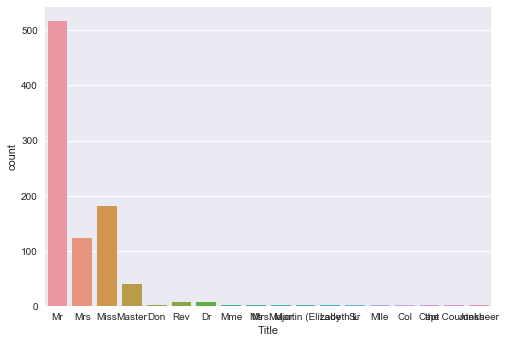

In [23]:
sns.countplot(titanic_df['Title']);

In [24]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction import DictVectorizer

feature_names = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Title']
dv = DictVectorizer()
dv.fit(titanic_df[feature_names].append(test_df[feature_names]).to_dict(orient='records'))
dv.feature_names_

['Age',
 'Fare',
 'Parch',
 'Pclass',
 'Sex',
 'SibSp',
 'Title=Capt',
 'Title=Col',
 'Title=Don',
 'Title=Dona',
 'Title=Dr',
 'Title=Jonkheer',
 'Title=Lady',
 'Title=Major',
 'Title=Master',
 'Title=Miss',
 'Title=Mlle',
 'Title=Mme',
 'Title=Mr',
 'Title=Mrs',
 'Title=Mrs. Martin (Elizabeth L',
 'Title=Ms',
 'Title=Rev',
 'Title=Sir',
 'Title=the Countess']

In [25]:
train_X, valid_X, test_y, valid_y = train_test_split(dv.transform(titanic_df[feature_names].to_dict(orient='records')),
                                                     titanic_df['Survived'],
                                                     test_size=0.2,
                                                     random_state=42)

In [29]:
train_X.shape

(712, 25)

0.924157303371
0.832402234637


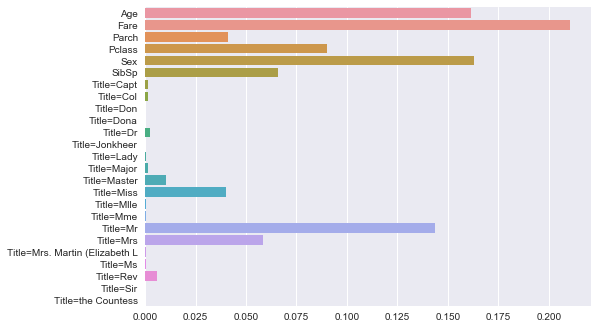

In [30]:
from sklearn.model_selection import train_test_split
rf_clf = RandomForestClassifier(random_state=42, n_estimators=200, max_depth=10)
rf_clf.fit(train_X, train_y)
print(rf_clf.score(train_X, train_y))
print(rf_clf.score(valid_X, valid_y))

sns.barplot(rf_clf.feature_importances_, dv.feature_names_);

In [39]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,Mr


## Exercício
A coluna Embarked contém o porto de embarque do passageiro. Algumas linhas não estão preenchidas.

In [31]:
titanic_df[pd.isnull(titanic_df['Embarked'])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
61,62,1,1,"Icard, Miss. Amelie",0,38.0,0,0,113572,80.0,B28,NaN,Miss
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",0,62.0,0,0,113572,80.0,B28,NaN,Mrs


- Implemente uma estratégia para fazer Imputation do porto de embarque desses passageiros. 
- Em seguida, faça o OneHotEncoding para que eles entrem na lista de Features do Modelo. Essas novas features melhoram o modelo de alguma forma?
- Crie uma nova feature, com o tamanho da familia. O tamanho da família é derivado de Parch e SibSp
- Inclua essa nova feature no modelo. Ela melhora o modelo de alguma forma?

In [33]:
#sns.countplot(titanic_df['Embarked']);
titanic_df[pd.isnull(titanic_df['Embarked'])]
titanic_df['Embarked'] = titanic_df['Embarked'].fillna('S')
test_df['Embarked'] = test_df['Embarked'].fillna('S')




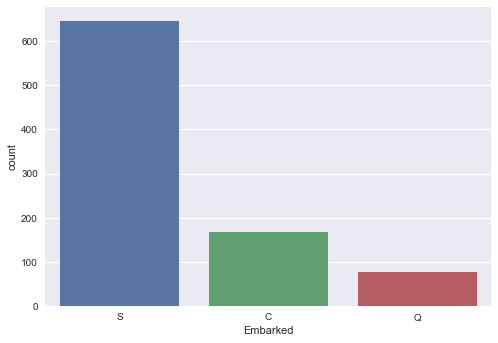

In [51]:
sns.countplot(titanic_df['Embarked']);

In [36]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction import DictVectorizer

feature_names = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Title' , 'Embarked']
dv = DictVectorizer()
dv.fit(titanic_df[feature_names].append(test_df[feature_names]).to_dict(orient='records'))
dv.feature_names_

['Age',
 'Embarked=C',
 'Embarked=Q',
 'Embarked=S',
 'Fare',
 'Parch',
 'Pclass',
 'Sex',
 'SibSp',
 'Title=Capt',
 'Title=Col',
 'Title=Don',
 'Title=Dona',
 'Title=Dr',
 'Title=Jonkheer',
 'Title=Lady',
 'Title=Major',
 'Title=Master',
 'Title=Miss',
 'Title=Mlle',
 'Title=Mme',
 'Title=Mr',
 'Title=Mrs',
 'Title=Mrs. Martin (Elizabeth L',
 'Title=Ms',
 'Title=Rev',
 'Title=Sir',
 'Title=the Countess']

0.929775280899
0.837988826816


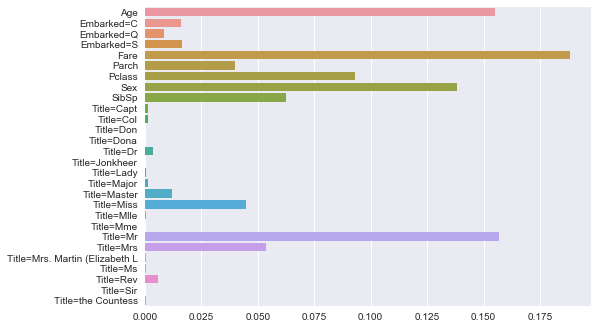

In [38]:
from sklearn.model_selection import train_test_split
rf_clf = RandomForestClassifier(random_state=42, n_estimators=200, max_depth=10)
rf_clf.fit(train_X, train_y)
print(rf_clf.score(train_X, train_y))
print(rf_clf.score(valid_X, valid_y))

sns.barplot(rf_clf.feature_importances_, dv.feature_names_);

In [52]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,Mr


## Submissão do Arquivo

In [40]:
train_X, valid_X, test_y, valid_y = train_test_split(dv.transform(titanic_df[feature_names].to_dict(orient='records')),
                                                     titanic_df['Survived'],
                                                     test_size=0.2,
                                                     random_state=42)

In [41]:
train_X = dv.transform(titanic_df[feature_names].to_dict(orient='records'))
train_y = titanic_df['Survived']

rf_clf = RandomForestClassifier(random_state=42, max_depth=10, n_estimators=200)
rf_clf.fit(train_X, train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=200, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False)

Infelizmente no dataset de teste, um dos passageiros está com Fare vazio. :-(

Para conseguirmos evoluir, vamos setar o Fare vazio para 0.0

In [42]:
test_df['Fare'] = test_df['Fare'].fillna(0)

Lembra que o sklean trabalha com matrizes numpy, certo?

In [43]:
test_X = dv.transform(test_df[feature_names].to_dict(orient='records'))
print(test_X.shape)

(418, 28)


Legal. Temos 418 amostras. Vamos usar o nosso modelo pra prever a sobrevivência dessas 418 pessoas.

In [44]:
y_pred = rf_clf.predict(test_X)

In [45]:
y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0,

Ótimo! Já temos aquilo que precisávamos. Próximo passo agora é empacotar num arquivo CSV e submeter no Kaggle.

In [46]:
submission_df = pd.DataFrame()

In [47]:
submission_df['PassengerId'] = test_df['PassengerId']
submission_df['Survived'] = y_pred
submission_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,0
7,899,0
8,900,1
9,901,0


In [48]:
submission_df.to_csv('feature_engineering.csv', index=False)

Por favor, anote aqui para referência: quanto foi o seu score de treinamento do modelo? E no dataset de Validação? Quanto foi o seu score na submissão do Kaggle?

In [50]:
LB = 0.78947
